## Import libraries


In [1]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
import re
#from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, log_loss, confusion_matrix)

# Load data

In [2]:
#read data 
df = pd.read_excel('EE_Analysis.xlsx')

# Data exploration
We use the head fucntion to inspect the data

In [3]:
df.head()

,Staff ID,Department,Grade,Age,Length of Total Service,Business Functions,Marital Status,Job Title,Location,Gender,...,Internal Transfer Opportunities,Performance Rating,Salary,Overtime,Attrition,Resignation Reason,DaysSinceLastPromotion,Training Hours,Unnamed: 21,Prediction
0,1,BD,2,32,5y,Front Office,Single,Associate,LD,Female,...,No,2.0,260000.0,No,Yes,Flexiable Work Options available,669,10.0,NaN,NaN
1,4,BD,3,27,2y 8m,Front Office,Single,Senior Associate,LD,Male,...,No,2.0,259200.0,Yes,Yes,Career Development,556,30.0,NaN,NaN
2,6,BD,3,39,3y 1m,Front Office,Married,Senior Officer - SME Relations,LD,Female,...,No,2.0,450000.0,No,Yes,Career Development,1131,20.0,NaN,NaN
3,7,BD,2,30,3y 11m,Front Office,Married,Associate,LD,Female,...,No,3.0,233450.4,Yes,Yes,IT Systems,1444,28.0,NaN,NaN
4,8,BD,2,33,6m,Front Office,Married,Associate,LD,Female,...,No,NaN,260000.0,Yes,Yes,Work Life Balance,186,18.0,NaN,NaN


In [70]:
df.shape

(721, 20)

The dataset  information about employees of a certain comapany. It includes 721 records and 20 fields. The data needs cleaning. 

In [4]:
#remove the unwanted columns that might corrupt our model
df = df.drop(['Unnamed: 21', 'Staff ID', 'Prediction'], axis=1)
print(df.columns)

Index(['Department', 'Grade ', 'Age', 'Length of Total Service',
       'Business Functions', 'Marital Status', 'Job Title', 'Location',
       'Gender', 'Ethnic Origin', 'Ethnicity', 'Education Level',
       'Internal Transfer Opportunities', 'Performance Rating', 'Salary',
       'Overtime', 'Attrition', 'Resignation Reason', 'DaysSinceLastPromotion',
       'Training Hours'],
      dtype='object')


The three variables 'Unnamed: 21', 'Staff ID'and 'Prediction' were removed since they were not part of the anlysis. 

In [5]:
#data structure. 
print(df.dtypes)

Department                          object
Grade                                int64
Age                                  int64
Length of Total Service             object
Business Functions                  object
Marital Status                      object
Job Title                           object
Location                            object
Gender                              object
Ethnic Origin                       object
Ethnicity                           object
Education Level                      int64
Internal Transfer Opportunities     object
Performance Rating                 float64
Salary                             float64
Overtime                            object
Attrition                           object
Resignation Reason                  object
DaysSinceLastPromotion               int64
Training Hours                     float64
dtype: object


The data contains both numerical variables and categorical variables. Variable 'Length of Total Service' was converted to numerical by change the duration to number of day. The steps are shown in the code below. 

In [6]:
#convert Length of Total Service to days. 
df['Length of Total Service'] = df['Length of Total Service'].fillna(0)

dates = []

for i in df['Length of Total Service']:
    # print(i)
    if i == 0:
        dates.append('N/A')
    else:
        try:
            i = (i.replace(' ', ''))
            dates.append(i.strip())
        except:
            pass

# len(dates)
units = {"m":30, "y":365 } 
def getY(dts):
    dts = re.findall(r"(\d+)(m|y)",dts)
    sum = 0
    for n,unit in dts:
        sum+=float(n)*units[unit]
    return sum

dates = ([getY(dt) for dt in dates])
df['Length of Total Service'] = dates




721


In [7]:
#check for missing values 
df.isna().sum()

Department                           0
Grade                                0
Age                                  0
Length of Total Service              0
Business Functions                   0
Marital Status                       0
Job Title                            0
Location                             0
Gender                               0
Ethnic Origin                        0
Ethnicity                            0
Education Level                      0
Internal Transfer Opportunities      0
Performance Rating                 113
Salary                               0
Overtime                             0
Attrition                            0
Resignation Reason                 658
DaysSinceLastPromotion               0
Training Hours                     276
dtype: int64

We also have missing values in the data. Varaibles 'Resignation Reason' has the biggest chunk of data with missing values.This becaused majority of the eployees were still working for the company at the time of data collection. Missing values were converted to zero. 

In [8]:
#Data summary for the numeric variables 
df.describe()

,Grade,Age,Length of Total Service,Education Level,Performance Rating,Salary,DaysSinceLastPromotion,Training Hours
count,721.000000,721.000000,721.000000,721.000000,608.000000,7.210000e+02,721.000000,445.000000
mean,2.617198,39.015257,2135.388350,3.335645,3.008224,5.169115e+05,789.721221,31.919101
std,1.109521,10.137447,2479.618192,0.848834,0.917484,3.137420e+05,761.021737,20.567680
min,1.000000,18.000000,0.000000,1.000000,1.000000,1.774500e+05,0.000000,1.000000
25%,1.000000,31.000000,635.000000,3.000000,2.000000,3.000000e+05,213.000000,16.000000
50%,3.000000,37.000000,1245.000000,3.000000,3.000000,4.154280e+05,473.000000,25.000000
75%,3.000000,45.000000,2795.000000,4.000000,4.000000,6.500000e+05,1095.000000,43.000000
max,5.000000,73.000000,16270.000000,5.000000,5.000000,2.000000e+06,2921.000000,89.000000


Using the decribe fucnftion we look at the summary statistic of the numeric variables. The average age of the emplyee is 39, with the eldest person being 73 years. The average rating of the employees is 3.34. Using the same describe function we check the data distribution of categorical varibles. 

In [9]:
#
df.describe(include=['O'])

,Department,Business Functions,Marital Status,Job Title,Location,Gender,Ethnic Origin,Ethnicity,Internal Transfer Opportunities,Overtime,Attrition,Resignation Reason
count,721,721,721,721,721,721,721,721,721,721,721,63
unique,35,3,7,326,6,2,17,2,2,2,2,11
top,OS,Back Office,Married,Senior Officer,LD,Female,Asian - Japanese,Local - Japanese,No,No,No,Career Development
freq,70,301,434,35,640,373,454,454,701,479,639,28


The target variables 'Attrition' shows that about 639 employees had not left the company when the data was collected. Majority of the employees (70) fall under OS depatment. Most of the employees were Local-Japances and came from LD loaction. Majority are female. We can used graph to better the visualiztion of the data. 


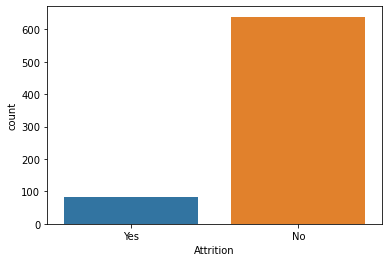

In [10]:
sns.countplot(x='Attrition', data=df)
# Show the plot
plt.show()

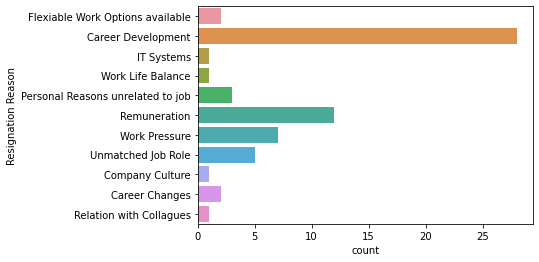

In [11]:
sns.countplot(y='Resignation Reason', data=df, orient='h')
# Show the plot
plt.show()

Majority of the eployees who left gave career Developement as the main reason for leaving the company. It also important to note that a good percentage alos left because of work remuneration and work pressure. 

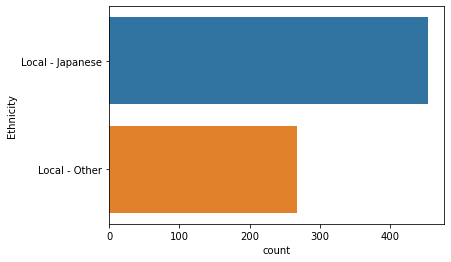

In [12]:
sns.countplot(y='Ethnicity', data=df, orient='h')
# Show the plot
plt.show()

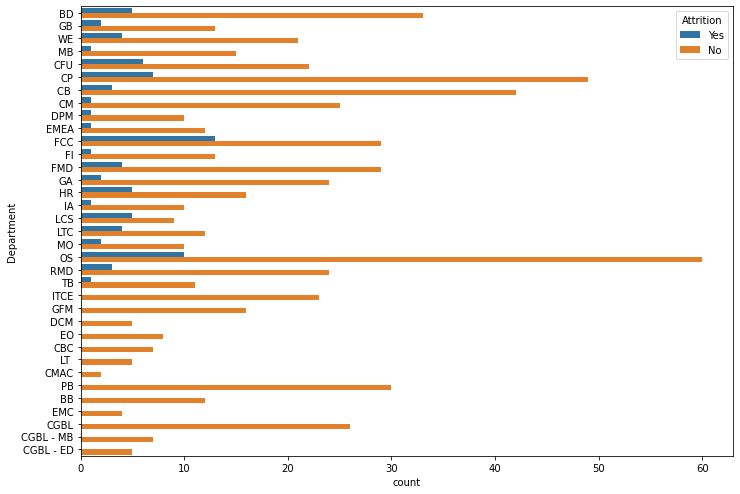

In [13]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot( ax=ax, y='Department', data=df, orient='h', hue="Attrition")
# Show the plot
plt.show()

Most of the employees who left were from the FCC department. 

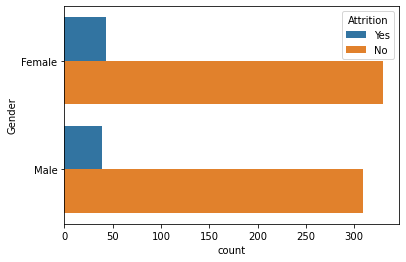

In [14]:
# By gender
sns.countplot(  y='Gender', data=df, orient='h', hue="Attrition")
# Show the plot
plt.show()

Ther was alomost an equal share of the employees who left between the two gender. Next step we convert the target variable to a binary variable with 0= No and 1= Yes. 

In [15]:
#convert target variable to binary
##Attrition
df['Attrition'] = df['Attrition'].replace({'No': 0, 'Yes': 1})
df['Attrition'].head()

0    1
1    1
2    1
3    1
4    1
Name: Attrition, dtype: int64

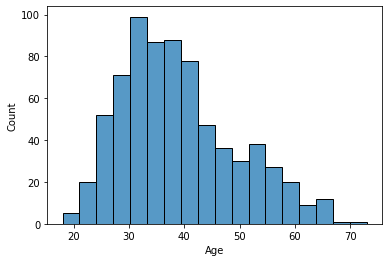

In [16]:
#data distribution for numeric variables
#Age 
sns.histplot(x= 'Age', data=df)
# Show the plot
plt.show()

The histogram shows that Age is positively skewed and does not follow a normal distribution. 

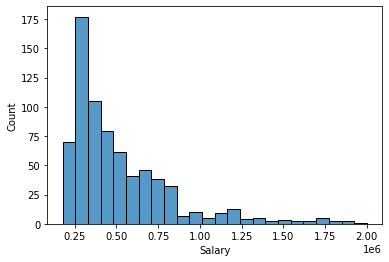

In [17]:
sns.histplot(x= 'Salary', data=df)
# Show the plot
plt.show()

Likewise salary is also strongly skewed to the right as shown in the graph above. 

In [18]:
#correlation 
corr = df.corr()
corr = (corr)
corr

,Grade,Age,Length of Total Service,Education Level,Performance Rating,Salary,Attrition,DaysSinceLastPromotion,Training Hours
Grade,1.000000,0.442956,0.261136,-0.015281,0.267174,0.701686,-0.037866,0.083680,-0.056334
Age,0.442956,1.000000,0.515209,-0.224948,0.078509,0.476519,-0.145435,0.462486,-0.064471
Length of Total Service,0.261136,0.515209,1.000000,-0.199020,0.117488,0.129213,-0.128114,0.607812,-0.156686
Education Level,-0.015281,-0.224948,-0.199020,1.000000,0.039794,-0.083766,0.012758,-0.123240,0.022069
Performance Rating,0.267174,0.078509,0.117488,0.039794,1.000000,0.206841,0.022190,-0.175589,-0.016652
Salary,0.701686,0.476519,0.129213,-0.083766,0.206841,1.000000,-0.018941,0.108531,0.015357
Attrition,-0.037866,-0.145435,-0.128114,0.012758,0.022190,-0.018941,1.000000,-0.136305,-0.009839
DaysSinceLastPromotion,0.083680,0.462486,0.607812,-0.123240,-0.175589,0.108531,-0.136305,1.000000,-0.122653
Training Hours,-0.056334,-0.064471,-0.156686,0.022069,-0.016652,0.015357,-0.009839,-0.122653,1.000000


The Table above shows correlation between the numeric variables. We do not have highly correlated variables. This shows that we do not have a Multicollinearity problem. Pair plot demonstrates the correlation in a visual way as shown below. 

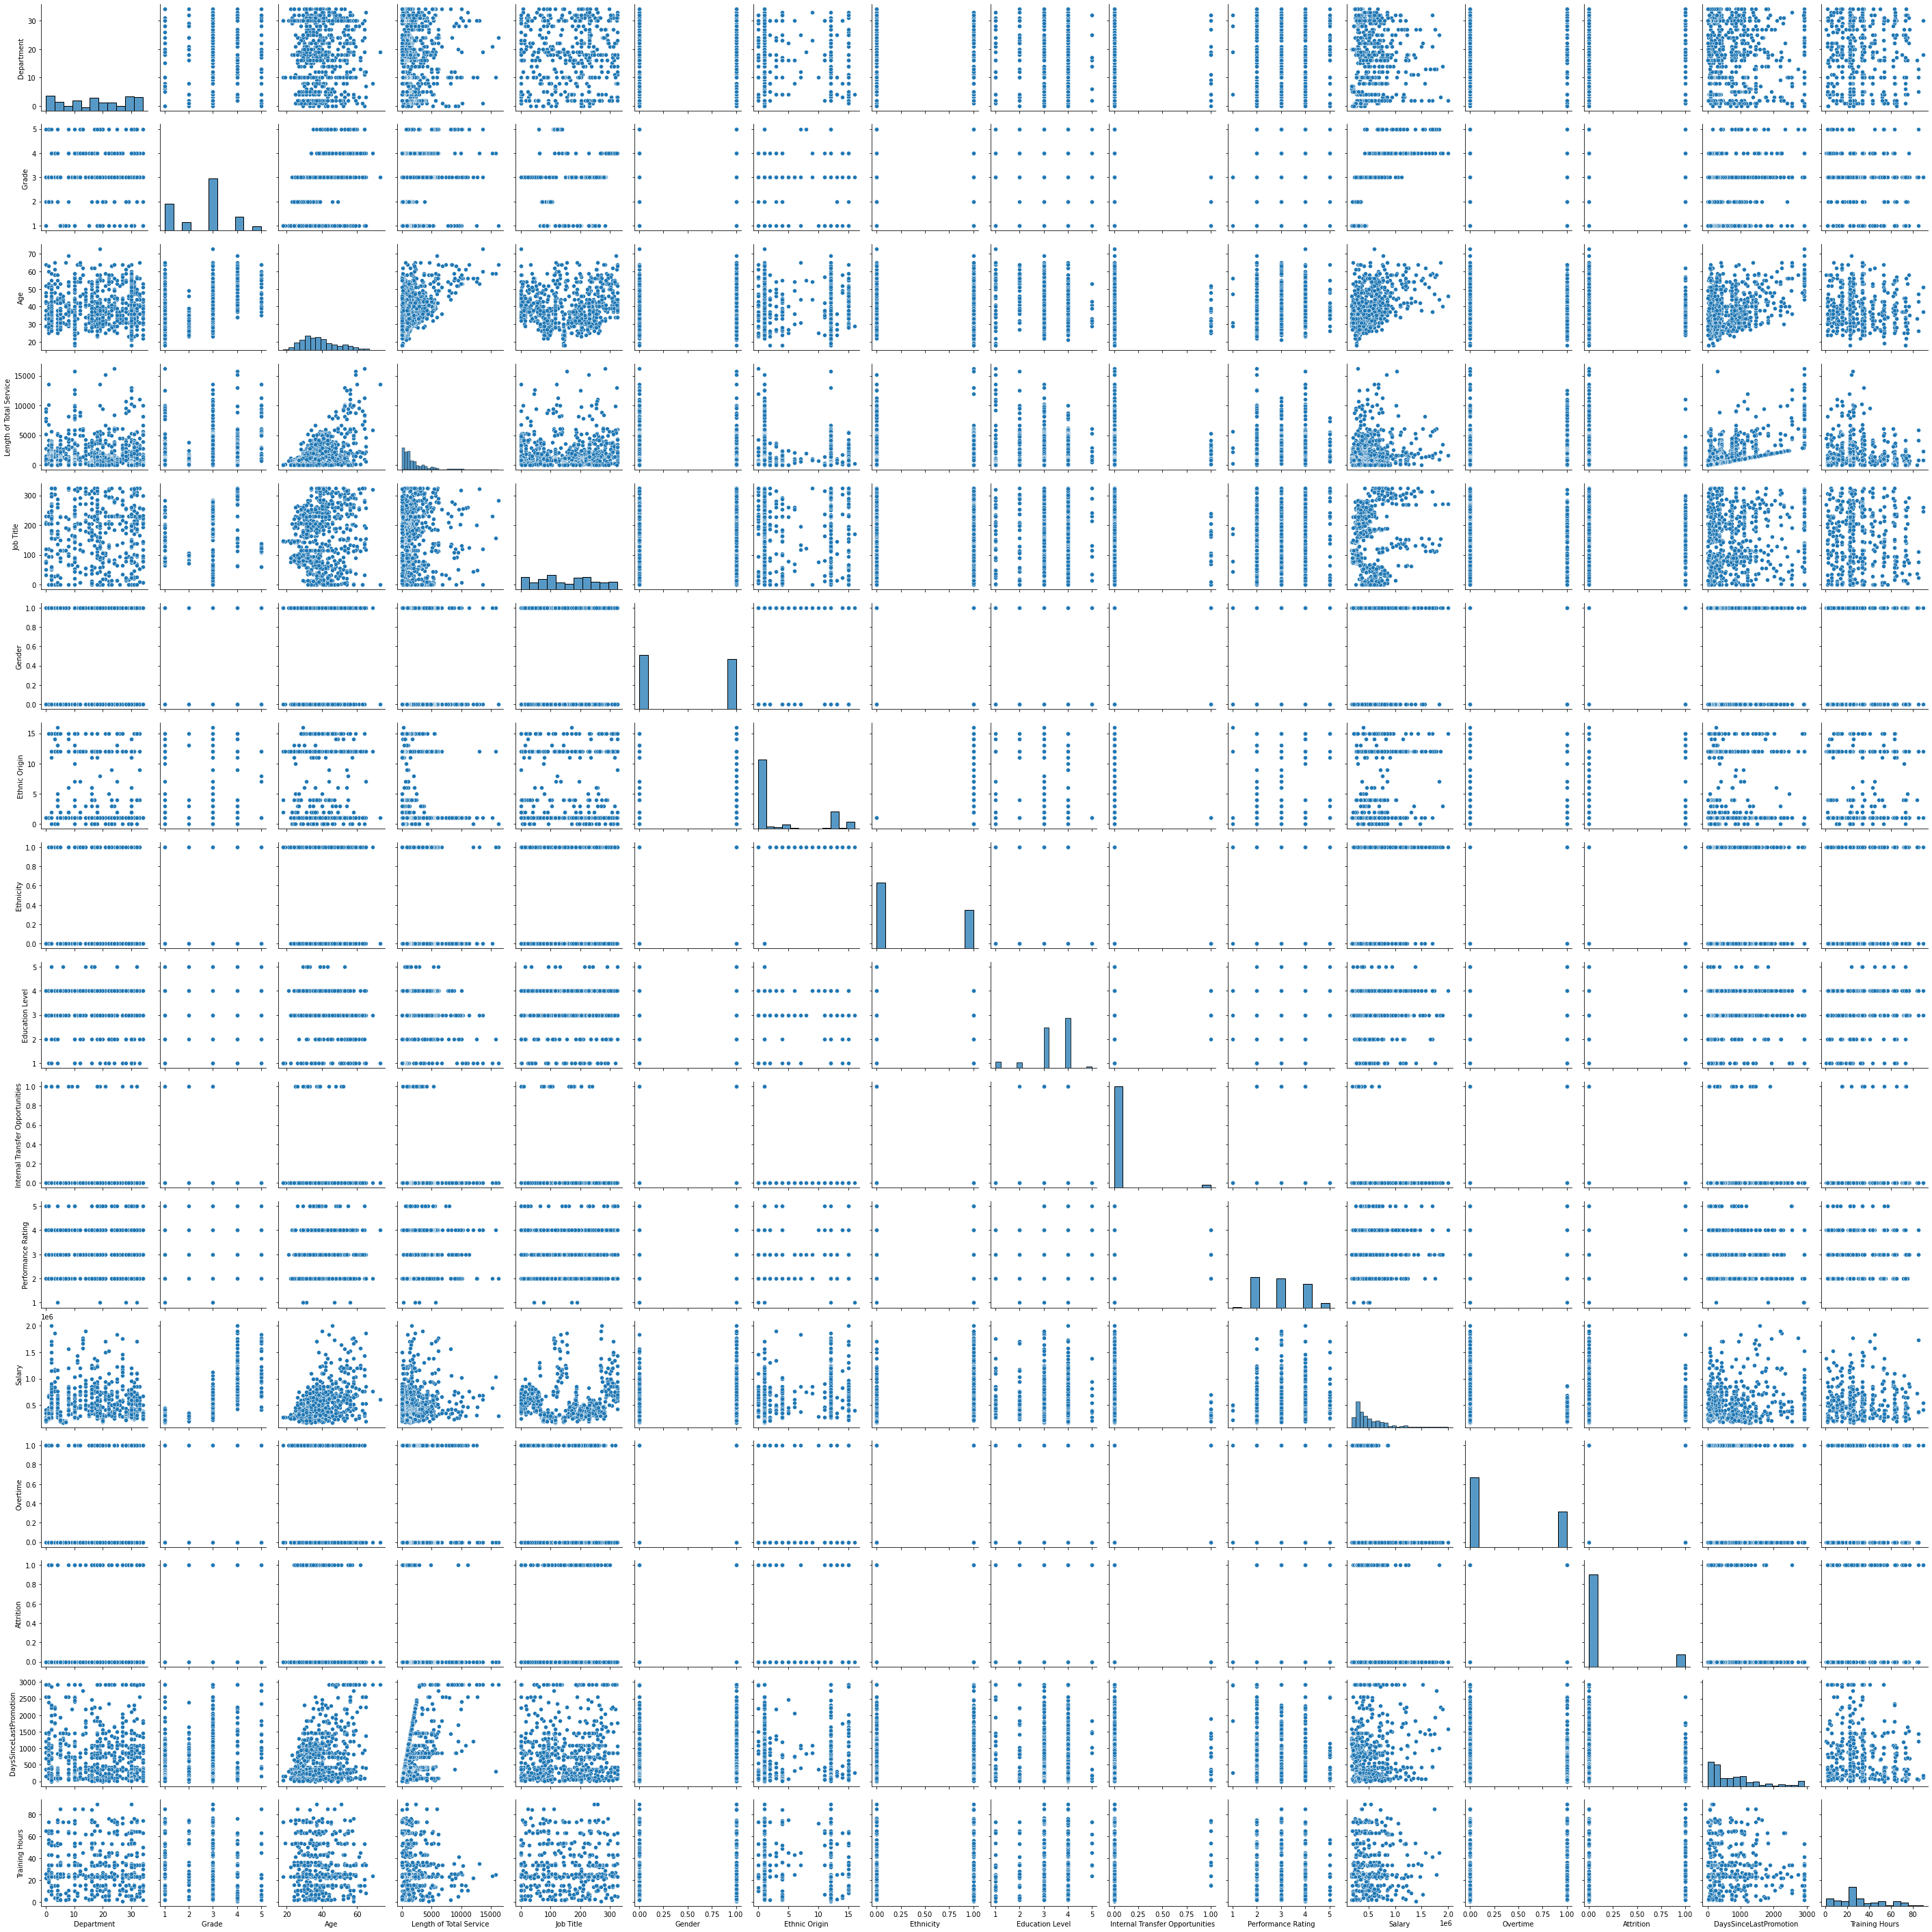

In [71]:
sns.pairplot(df)
plt.show()

Categorical variables with two levels and those with so mant levels such as 'Department' with 37 levels were converted to discrete variables. Those with few level suchs as 'reason for resgnation' whic had 11 levels were converted to dummy variables. 

In [72]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Job Title']=label_encoder.fit_transform(df['Job Title'])
df['Department']=label_encoder.fit_transform(df['Department'])
df['Ethnicity']=label_encoder.fit_transform(df['Ethnicity'])
df['Ethnic Origin']=label_encoder.fit_transform(df['Ethnic Origin'])
df['Internal Transfer Opportunities']=label_encoder.fit_transform(df['Internal Transfer Opportunities'])
df['Overtime']=label_encoder.fit_transform(df['Overtime'])
df['Gender']=label_encoder.fit_transform(df['Gender'])

#create dummy variables
df2= df.copy()
cat_vars=['Business Functions','Location',"Marital Status",
          'Resignation Reason']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df2[var], prefix=var)
    data1=df2.join(cat_list)
    df2=data1
cat_vars=['Business Functions','Location',"Marital Status",
          'Resignation Reason']
data_vars=df2.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=df2[to_keep]
data_final.shape


(721, 43)

The final data has 721 obseravtion and 43 variables. 

# Implementing the models
We begin by dividing the data into X for predictor variables and y for the dependent variable. 

In [73]:
#split the data 
X = data_final.drop('Attrition', axis=1)
y = data_final['Attrition']
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)


C:\Users\user\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


# Feature Selection
Feature selection or variable selection is a cardinal process in the feature engineering technique which is used to reduce the number of independent variables by picking out only those that have a paramount effect on the target attribute.
We used Forward Selection as the perefer method to select our independent variavles. 
Forward selection is a wrapper model that evaluates the predictive power of the features jointly and returns a set of features that performs the best. It selects the predictors one by one and chooses that combination of features that makes the model perform the best based on the cumulative residual sum of squares. This process continues till there is no impact on the performance of the model with the incoming variable.

In [74]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector
forward_feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
           k_features=10,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=4)
fselector = forward_feature_selector.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:   26.4s finished

[2022-11-06 01:09:53] Features: 1/10 -- score: 0.730645589997005[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   24.4s finished

[2022-11-06 01:10:18] Features: 2/10 -- score: 0.8436134274857743[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   22.6s finished

[2022-11-06 01:10:40] Features: 3/10 -- score: 0.9011062560834082[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [75]:
fward=fselector.k_feature_names_
list2=list(fward)
list2

['DaysSinceLastPromotion',
 'Training Hours',
 'Business Functions_Back Office',
 'Business Functions_Front Office',
 'Location_MB',
 'Resignation Reason_Career Development',
 'Resignation Reason_Company Culture',
 'Resignation Reason_Remuneration',
 'Resignation Reason_Unmatched Job Role',
 'Resignation Reason_Work Life Balance']

The list show the variables selected in our dataset. We will only use those variables to build our models. 

In [76]:
X= X[list2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)

print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (504, 10)
X_test :  (217, 10)
y_train :  (504,)
y_test :  (217,)


We divide our data into train and test at a raion of 70% for train dataset and 30% for the test data set.

# Logistic Regression Model Fitting

In [77]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.228957
         Iterations: 35
                                        Results: Logit
Model:                         Logit                     Pseudo R-squared:          0.354     
Dependent Variable:            Attrition                 AIC:                       350.1558  
Date:                          2022-11-06 01:14          BIC:                       395.9622  
No. Observations:              721                       Log-Likelihood:            -165.08   
Df Model:                      9                         LL-Null:                   -255.41   
Df Residuals:                  711                       LLR p-value:               3.6785e-34
Converged:                     0.0000                    Scale:                     1.0000    
No. Iterations:                35.0000                                                        
----------------------------------------------------------------------------------------------
                        

C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [78]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
confusion_matrix2 = confusion_matrix(y_test, y_pred)
print(confusion_matrix2)

[[187   0]
 [ 17  13]]


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       187
           1       1.00      0.43      0.60        30

    accuracy                           0.92       217
   macro avg       0.96      0.72      0.78       217
weighted avg       0.93      0.92      0.91       217



The logistic regression model correctly predicted our data with an accuracy of 92% with a precision of 0.93, recall 0.92 and an f1-score of 0.91 

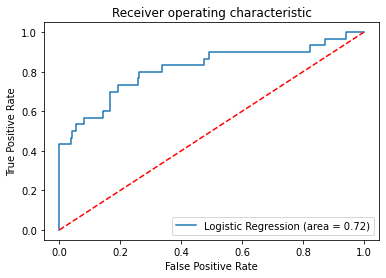

In [82]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The Roc curve show that our model performed really well. 
The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner). 
We can now compare our logit model with other models. 

# Decision tree

In [84]:
#Decision tree

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

acc_dt_model = accuracy_score(y_test, dt_pred)
print("Decision Tree accuracy:","{:.4f}".format(acc_dt_model))

Decision Tree accuracy: 0.9309


In [85]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       187
           1       0.86      0.60      0.71        30

    accuracy                           0.93       217
   macro avg       0.90      0.79      0.83       217
weighted avg       0.93      0.93      0.93       217



The decidion tree had a better accuracy of 93.09% with a precision of 0.93, recall 0.93 and an f1-score of 0.93.  

# Support Vector machine

In [86]:
#Support Vector machine 
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

acc_svc_model = accuracy_score(y_test, svc_pred)
print("Support Vector Machines accuracy:","{:.4f}".format(acc_svc_model))

Support Vector Machines accuracy: 0.8618


In [87]:
print(classification_report(y_test, svc_pred ))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       187
           1       0.00      0.00      0.00        30

    accuracy                           0.86       217
   macro avg       0.43      0.50      0.46       217
weighted avg       0.74      0.86      0.80       217



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Support Vector machine model was no better. The model had an accuracy of 86.18 % with a precision of 0.74, recall 0.86 and an f1-score of 0.80

# Random forest 

In [88]:
#Random forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

acc_rf_model = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:","{:.3f}".format(acc_rf_model))

Random Forest Accuracy: 0.931


In [89]:
print(classification_report(y_test, rf_pred ))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       187
           1       0.94      0.53      0.68        30

    accuracy                           0.93       217
   macro avg       0.94      0.76      0.82       217
weighted avg       0.93      0.93      0.92       217



Random Forest had an accuracy of 93.1% with a precision of 0.93, recall 0.93 and an f1-score of 0.92

# Gradient boost.

In [90]:
#Gradient boost. 
gbt_model = GradientBoostingClassifier()
gbt_model.fit(X_train, y_train)
gbt_pred = gbt_model.predict(X_test)

acc_gbt_model = accuracy_score(y_test, gbt_pred)
print("Gradient boosting Tree Accuracy:","{:.3f}".format(acc_gbt_model))

Gradient boosting Tree Accuracy: 0.940


In [91]:
print(classification_report(y_test, rf_pred ))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       187
           1       0.94      0.53      0.68        30

    accuracy                           0.93       217
   macro avg       0.94      0.76      0.82       217
weighted avg       0.93      0.93      0.92       217



Gradient boost out performed all the other model. The model had an accuracy of 94% with a precision of 0.93, recall 0.93 and an f1-score of 0.92

# Variable Importance.

In [94]:
# Scatter plot 
trace = go.Scatter(
    y = rf_model.feature_importances_,
    x = X_train.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf_model.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = X_train.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
fig.show()
# py.iplot(fig,filename='scatter2010')

According the the above graph Career Development, DaysSinceLastPromotion and Training hours were the most important predictor of Attrition. The best model for the company to used to predict if a customer to leave is gradient boost. 